In [5]:
# Dependencies
import pandas as pd
import hvplot.pandas
import requests
import matplotlib.pyplot as plt
import numpy as np
import json
# import folium

# Import API key
# from api_keys import geoapify_key

In [6]:
# The correct encoding must be used to read the CSV in pandas
kyoto = pd.read_csv("../Resources/Kyoto_Restaurant_Info.csv")

# Display sample data
kyoto_df=pd.DataFrame(kyoto)
kyoto_df


,Unnamed: 0,Name,JapaneseName,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,DinnerRating,LunchRating,ReviewNum,Lat,Long
0,1,Orudeidainingurajou,オールデイダイニング ラジョウ,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,3.20,3.38,56,34.986175,135.761314
1,2,Steak Frites Gaspard zinzin,ステックフリット ガスパール ザンザン,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,3.06,3.33,70,35.005826,135.759857
2,3,KAZUMA,和馬,Sanjo,Izakaya (Tavern),Japanese food (other),￥3000～￥3999,NaN,3.28,3.28,NaN,7,35.006583,135.770247
3,4,okonomiyakiteppanyakimiki,お好み焼き 鉄板焼き 三喜,Tambaguchi,Okonomiyaki,Izakaya (Tavern),￥3000～￥3999,NaN,3.14,3.14,NaN,16,34.995924,135.748267
4,5,Shaofeiyan,小肥羊 京都河原町店,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,￥4000～￥4999,￥1000～￥1999,3.16,3.16,3.05,23,35.007901,135.768202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,891,Waraku,和楽,Fukuchiyama,Izakaya (Tavern),Kaiseki (Traditional Japanese),￥2000～￥2999,～￥999,3.00,3.06,3.00,12,35.298917,135.118341
891,892,YEBISU BAR,エビスバー 京都ヨドバシ店,Kyoto,Beer bar,Bar,￥3000～￥3999,～￥999,3.08,3.07,3.08,70,34.988132,135.759215
892,893,Ibushiginkazuya,燻吟 かず家,Kawaramachi,Bar,Nihonshu (Japanese sake),￥3000～￥3999,NaN,3.36,3.36,3.05,11,35.006449,135.769653
893,894,Tenichi,天一 京都伊勢丹店,Kyoto,Tempura,Ten-don (Tempura Bowl),￥6000～￥7999,￥2000～￥2999,3.51,3.32,3.53,52,34.985887,135.757672


In [7]:
kyoto_df.drop('Unnamed: 0', axis=1, inplace=True)
# df = df.drop(columns=['Unnamed: 0'])
# del df['Unnamed: 0']
# df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

kyoto_df.head(5)

,Name,JapaneseName,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,DinnerRating,LunchRating,ReviewNum,Lat,Long
0,Orudeidainingurajou,オールデイダイニング ラジョウ,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,3.20,3.38,56,34.986175,135.761314
1,Steak Frites Gaspard zinzin,ステックフリット ガスパール ザンザン,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,3.06,3.33,70,35.005826,135.759857
2,KAZUMA,和馬,Sanjo,Izakaya (Tavern),Japanese food (other),￥3000～￥3999,NaN,3.28,3.28,NaN,7,35.006583,135.770247
3,okonomiyakiteppanyakimiki,お好み焼き 鉄板焼き 三喜,Tambaguchi,Okonomiyaki,Izakaya (Tavern),￥3000～￥3999,NaN,3.14,3.14,NaN,16,34.995924,135.748267
4,Shaofeiyan,小肥羊 京都河原町店,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,￥4000～￥4999,￥1000～￥1999,3.16,3.16,3.05,23,35.007901,135.768202


In [8]:
len(kyoto_df)

895

In [9]:
# Drop any row with Nan
kyoto_df.dropna(inplace=True)
print(len(kyoto_df))
kyoto_df.head()

398


,Name,JapaneseName,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,DinnerRating,LunchRating,ReviewNum,Lat,Long
0,Orudeidainingurajou,オールデイダイニング ラジョウ,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,3.20,3.38,56,34.986175,135.761314
1,Steak Frites Gaspard zinzin,ステックフリット ガスパール ザンザン,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,3.06,3.33,70,35.005826,135.759857
4,Shaofeiyan,小肥羊 京都河原町店,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,￥4000～￥4999,￥1000～￥1999,3.16,3.16,3.05,23,35.007901,135.768202
5,okuta-va,OCTAVAR,Kyoto,Bar,Italian,￥4000～￥4999,￥1000～￥1999,3.08,3.00,3.11,24,34.983497,135.760559
6,Resort dining&bar HaLe,Resort dining&bar HaLe 河原町店,Sanjo,Italian,Bar,￥3000～￥3999,￥1000～￥1999,3.04,3.05,3.00,22,35.007195,135.769468


In [10]:
kyoto_df = kyoto_df.reset_index(drop=True, inplace=False)
kyoto_df.head(7)

,Name,JapaneseName,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,DinnerRating,LunchRating,ReviewNum,Lat,Long
0,Orudeidainingurajou,オールデイダイニング ラジョウ,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,3.20,3.38,56,34.986175,135.761314
1,Steak Frites Gaspard zinzin,ステックフリット ガスパール ザンザン,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,3.06,3.33,70,35.005826,135.759857
2,Shaofeiyan,小肥羊 京都河原町店,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,￥4000～￥4999,￥1000～￥1999,3.16,3.16,3.05,23,35.007901,135.768202
3,okuta-va,OCTAVAR,Kyoto,Bar,Italian,￥4000～￥4999,￥1000～￥1999,3.08,3.00,3.11,24,34.983497,135.760559
4,Resort dining&bar HaLe,Resort dining&bar HaLe 河原町店,Sanjo,Italian,Bar,￥3000～￥3999,￥1000～￥1999,3.04,3.05,3.00,22,35.007195,135.769468
5,Gionabesu,祇園 Abbesses,Gion Shijo,French,Italian,￥8000～￥9999,￥6000～￥7999,3.58,3.54,3.56,120,35.001954,135.774821
6,gionni-yongo,祗園245,Sanjo Keihan,Italian,French,￥10000～￥14999,￥6000～￥7999,3.85,3.83,3.75,39,35.006301,135.775623


# Clean up data frame

In [11]:
for index in range(len(kyoto_df["FirstCategory"])):   
    print(f"index:{index} - {kyoto_df.loc[index]['FirstCategory']}  |||  {kyoto_df.loc[index]['SecondCategory']}")

index:0 - Buffet style  |||  Cafe
index:1 - Bistro  |||  Steak
index:2 - Chinese hot pot / fire pot  |||  Chinese
index:3 - Bar  |||  Italian
index:4 - Italian  |||  Bar
index:5 - French  |||  Italian
index:6 - Italian  |||  French
index:7 - Izakaya (Tavern)  |||  Nihonshu (Japanese sake)
index:8 - Izakaya (Tavern)  |||  Seafood
index:9 - Pork Shabu Shabu  |||  Shabu Shabu (Japanese Steamboat)
index:10 - Izakaya (Tavern)  |||  Yakitori (Grilled chicken)
index:11 - Italian  |||  Western Cuisine
index:12 - Yakiniku (BBQ Beef)  |||  Sukiyaki
index:13 - Bistro  |||  Bar
index:14 - Italian  |||  Pasta
index:15 - Izakaya (Tavern)  |||  Creative cuisine
index:16 - Tempura  |||  Kaiseki (Traditional Japanese)
index:17 - Italian  |||  Pizza
index:18 - Dining bar  |||  Steak
index:19 - Izakaya (Tavern)  |||  Creative cuisine
index:20 - Buffet style  |||  Cafe
index:21 - Kaiseki (Traditional Japanese)  |||  Kyoto Cuisine
index:22 - Chinese  |||  Dim sum
index:23 - Kyoto Cuisine  |||  Kaiseki (Tra

In [12]:
searchfor = ["Italian","French","Spain","Bar","Traditional Café","Pizza","European","Pasta","Beef dishes"]

kyoto_df.loc[kyoto_df["FirstCategory"].str.contains('|'.join(searchfor))==True, "Region"]="European"
kyoto_df.head(1)

,Name,JapaneseName,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,DinnerRating,LunchRating,ReviewNum,Lat,Long,Region
0,Orudeidainingurajou,オールデイダイニング ラジョウ,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,3.2,3.38,56,34.986175,135.761314,NaN


In [13]:
import itertools 

searchfor = []
search1 = ["Buffet","Chinese","Izakaya","Tempura","Kyoto","Korean","Viet","Kappo","Sushi","Tsukemen","Kappo"]
search2 = ["Kaiseki","Okonomiyaki","Pork","Yakiniku","eel","Sichuan","Shanghai","Sweets","Udon","Kushi-age"]
search3 = ["Kushi","Thailand","Tofu","Ryokan","Shabu","Yakitori","Okinawan","Crab","Creative","Noodle","soba","Soba"]
search4 = ["Blowfish","Seafood","Ramen","Japanese","India","other","Robatayaki","Oyako-don","Cantonese","Parfait"]
search5 = ["Innovative"]

searchfor = list(itertools.chain(search1,search2,search3,search4,search5))

kyoto_df.loc[kyoto_df["FirstCategory"].str.contains('|'.join(searchfor))==True, "Region"]="Asian"
kyoto_df.head(1)


,Name,JapaneseName,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,DinnerRating,LunchRating,ReviewNum,Lat,Long,Region
0,Orudeidainingurajou,オールデイダイニング ラジョウ,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,3.2,3.38,56,34.986175,135.761314,Asian


In [14]:
search1 = ["Steak","Beer bar","Bistro","Teppanyaki","Dining","Cafe","Western","Beer","Mexico","Crepes","Pancake"]
search2 = ["Bread","Mexico","Bread","table d'hôte"]

searchfor = list(itertools.chain(search1,search2))


kyoto_df.loc[kyoto_df["FirstCategory"].str.contains('|'.join(searchfor))==True, "Region"]="American"
kyoto_df.head(10)

,Name,JapaneseName,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,DinnerRating,LunchRating,ReviewNum,Lat,Long,Region
0,Orudeidainingurajou,オールデイダイニング ラジョウ,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,3.20,3.38,56,34.986175,135.761314,Asian
1,Steak Frites Gaspard zinzin,ステックフリット ガスパール ザンザン,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,3.06,3.33,70,35.005826,135.759857,American
2,Shaofeiyan,小肥羊 京都河原町店,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,￥4000～￥4999,￥1000～￥1999,3.16,3.16,3.05,23,35.007901,135.768202,Asian
3,okuta-va,OCTAVAR,Kyoto,Bar,Italian,￥4000～￥4999,￥1000～￥1999,3.08,3.00,3.11,24,34.983497,135.760559,European
4,Resort dining&bar HaLe,Resort dining&bar HaLe 河原町店,Sanjo,Italian,Bar,￥3000～￥3999,￥1000～￥1999,3.04,3.05,3.00,22,35.007195,135.769468,European
5,Gionabesu,祇園 Abbesses,Gion Shijo,French,Italian,￥8000～￥9999,￥6000～￥7999,3.58,3.54,3.56,120,35.001954,135.774821,European
6,gionni-yongo,祗園245,Sanjo Keihan,Italian,French,￥10000～￥14999,￥6000～￥7999,3.85,3.83,3.75,39,35.006301,135.775623,European
7,Sakaean,さかえ庵,Karasuma,Izakaya (Tavern),Nihonshu (Japanese sake),￥2000～￥2999,～￥999,3.09,3.10,3.06,31,35.004684,135.762414,Asian
8,ANAGOYA NORESORE,穴子家 NORESORE 京都本店,Nijojo Mae,Izakaya (Tavern),Seafood,￥5000～￥5999,￥2000～￥2999,3.50,3.07,3.55,16,35.012585,135.753619,Asian
9,kyoutohyouto,京都 瓢斗 京都店,Karasuma,Pork Shabu Shabu,Shabu Shabu (Japanese Steamboat),￥8000～￥9999,￥2000～￥2999,3.64,3.66,3.58,46,35.005591,135.758329,Asian


In [15]:
# To make sure no value in "FirstCategory" is not assigned to any of three regions.
kyoto_df[kyoto_df['Region'].isin(["Asian","European","American"])==False]

,Name,JapaneseName,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,DinnerRating,LunchRating,ReviewNum,Lat,Long,Region


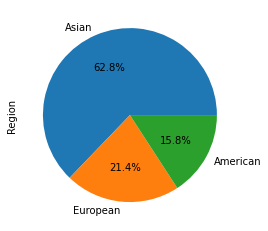

In [16]:
counts = kyoto_df.Region.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
plt.show()

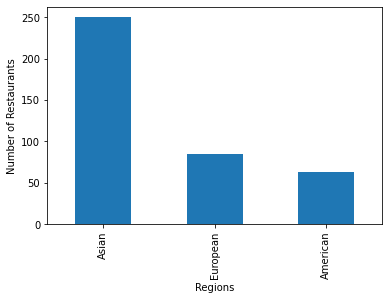

In [17]:
counts = kyoto_df['Region'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Regions")
plt.xticks(rotation=90)
plt.ylabel("Number of Restaurants")
plt.show()

In [18]:
# Delete extraneous column
kyoto_df = kyoto_df.drop(columns = ["JapaneseName", "DinnerRating", "LunchRating"])
kyoto_df.head()

,Name,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,ReviewNum,Lat,Long,Region
0,Orudeidainingurajou,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,56,34.986175,135.761314,Asian
1,Steak Frites Gaspard zinzin,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,70,35.005826,135.759857,American
2,Shaofeiyan,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,￥4000～￥4999,￥1000～￥1999,3.16,23,35.007901,135.768202,Asian
3,okuta-va,Kyoto,Bar,Italian,￥4000～￥4999,￥1000～￥1999,3.08,24,34.983497,135.760559,European
4,Resort dining&bar HaLe,Sanjo,Italian,Bar,￥3000～￥3999,￥1000～￥1999,3.04,22,35.007195,135.769468,European


# Combine First and second Category


In [19]:
kyoto_df['Category'] = kyoto_df[['FirstCategory', 'SecondCategory']].apply(lambda x: ' '.join(x.astype(str)), axis=1)

# Drop the original columns
kyoto_mergeCat_df = kyoto_df.drop(['FirstCategory', 'SecondCategory'], axis=1)

kyoto_mergeCat_df

,Name,Station,DinnerPrice,LunchPrice,TotalRating,ReviewNum,Lat,Long,Region,Category
0,Orudeidainingurajou,Kyoto,￥4000～￥4999,￥2000～￥2999,3.39,56,34.986175,135.761314,Asian,Buffet style Cafe
1,Steak Frites Gaspard zinzin,Karasuma,￥3000～￥3999,￥1000～￥1999,3.18,70,35.005826,135.759857,American,Bistro Steak
2,Shaofeiyan,Kyoto Shiyakusho Mae,￥4000～￥4999,￥1000～￥1999,3.16,23,35.007901,135.768202,Asian,Chinese hot pot / fire pot Chinese
3,okuta-va,Kyoto,￥4000～￥4999,￥1000～￥1999,3.08,24,34.983497,135.760559,European,Bar Italian
4,Resort dining&bar HaLe,Sanjo,￥3000～￥3999,￥1000～￥1999,3.04,22,35.007195,135.769468,European,Italian Bar
...,...,...,...,...,...,...,...,...,...,...
393,Menshoutakamatsu,Karasuma,～￥999,～￥999,3.58,203,35.006261,135.760849,Asian,Tsukemen Ramen
394,Waraku,Fukuchiyama,￥2000～￥2999,～￥999,3.00,12,35.298917,135.118341,Asian,Izakaya (Tavern) Kaiseki (Traditional Japanese)
395,YEBISU BAR,Kyoto,￥3000～￥3999,～￥999,3.08,70,34.988132,135.759215,American,Beer bar Bar
396,Tenichi,Kyoto,￥6000～￥7999,￥2000～￥2999,3.51,52,34.985887,135.757672,Asian,Tempura Ten-don (Tempura Bowl)


# Soft ReviewNum Large to low

In [20]:
kyoto_softReviewNum_df = kyoto_mergeCat_df.sort_values("ReviewNum", ascending=False)
kyoto_softReviewNum_df

,Name,Station,DinnerPrice,LunchPrice,TotalRating,ReviewNum,Lat,Long,Region,Category
336,Honkedaiichiasahi,Kyoto,～￥999,～￥999,3.60,1319,34.986695,135.762508,Asian,Ramen Dumplings
273,chuukasobatakayasu,Ichijoji,～￥999,～￥999,3.59,713,35.045052,135.785180,Asian,Ramen Boneless deep-fried chicken
14,Zasoudouhigashiyamakyouto,Gion Shijo,￥6000～￥7999,￥2000～￥2999,3.61,272,34.998896,135.779668,European,Italian Pasta
25,Kyoutogiontempurayasakaendou,Gion Shijo,￥10000～￥14999,￥5000～￥5999,3.68,252,34.998915,135.775112,Asian,Tempura Kaiseki (Traditional Japanese)
393,Menshoutakamatsu,Karasuma,～￥999,～￥999,3.58,203,35.006261,135.760849,Asian,Tsukemen Ramen
...,...,...,...,...,...,...,...,...,...,...
57,ajidokorosamon,Sai,￥3000～￥3999,～￥999,3.05,2,35.003907,135.734330,Asian,Izakaya (Tavern) Okinawan Cuisine
326,nikubaruandohorumonnabetaigu,Kyoto Shiyakusho Mae,￥3000～￥3999,￥1000～￥1999,3.04,2,35.011679,135.770644,European,Bar Motsu Nabe (Offel Hot Pot)
106,Bar PLAYGROUND,Imadegawa,￥3000～￥3999,￥1000～￥1999,3.06,2,35.029564,135.754755,European,Bar Wine bar
221,Cafe Lavender,Nijo,￥1000～￥1999,￥1000～￥1999,3.04,2,35.015018,135.742204,Asian,Buffet style Izakaya (other)


In [21]:
kyoto_softReviewNum_df = kyoto_df.sort_values("ReviewNum", ascending=False)
kyoto_filtered = kyoto_softReviewNum_df[["Name", "ReviewNum", "Region"]]
kyoto_filtered.head()

,Name,ReviewNum,Region
336,Honkedaiichiasahi,1319,Asian
273,chuukasobatakayasu,713,Asian
14,Zasoudouhigashiyamakyouto,272,European
25,Kyoutogiontempurayasakaendou,252,Asian
393,Menshoutakamatsu,203,Asian


# Soft TotalRating Large to low

In [22]:
kyoto_softReviewNum_df = kyoto_mergeCat_df.sort_values("TotalRating", ascending=False)
kyoto_softReviewNum_df

,Name,Station,DinnerPrice,LunchPrice,TotalRating,ReviewNum,Lat,Long,Region,Category
363,ORTO,Karasuma Oike,￥8000～￥9999,￥4000～￥4999,4.06,53,35.007991,135.757053,Asian,Innovative cuisine Fusion cuisine
50,Yosuke YAMAJI,Gion Shijo,￥20000～￥29999,￥8000～￥9999,4.02,44,35.002708,135.775670,European,French Modern French
270,nihonryourisakuragawa,Kyoto Shiyakusho Mae,￥20000～￥29999,￥8000～￥9999,3.89,61,35.012176,135.770684,Asian,Kaiseki (Traditional Japanese) Kappo (Traditio...
200,Orudohonkonresutorankyouto,Shijo,￥10000～￥14999,￥1000～￥1999,3.88,148,35.003150,135.759123,Asian,Chinese Cantonese Cuisine
6,gionni-yongo,Sanjo Keihan,￥10000～￥14999,￥6000～￥7999,3.85,39,35.006301,135.775623,European,Italian French
...,...,...,...,...,...,...,...,...,...,...
132,kyoumachiyaitarianronkusu,Kawaramachi,￥5000～￥5999,￥2000～￥2999,3.00,15,35.000321,135.766175,European,Italian Sumibiyaki
339,Nagagutsutei,Jingu Marutamachi,￥3000～￥3999,￥2000～￥2999,3.00,21,35.015274,135.776008,European,Pasta Pizza
137,konana,Karasuma,￥1000～￥1999,￥1000～￥1999,3.00,21,35.004819,135.761222,European,Pasta Cafe
361,Chikyuuizakayashibuya,Nagitsuji,￥2000～￥2999,～￥999,3.00,10,34.971089,135.814207,Asian,Izakaya (Tavern) Japanese food (other)


In [23]:
kyoto_softReviewNum_df = kyoto_df.sort_values("TotalRating", ascending=False)
kyoto_filtered = kyoto_softReviewNum_df[["Name", "TotalRating", "Region"]]
kyoto_filtered.head()

,Name,TotalRating,Region
363,ORTO,4.06,Asian
50,Yosuke YAMAJI,4.02,European
270,nihonryourisakuragawa,3.89,Asian
200,Orudohonkonresutorankyouto,3.88,Asian
6,gionni-yongo,3.85,European


# Count Lunch Price in how many resturant

In [24]:
kyoto_df.count()

Name              398
Station           398
FirstCategory     398
SecondCategory    398
DinnerPrice       398
LunchPrice        398
TotalRating       398
ReviewNum         398
Lat               398
Long              398
Region            398
Category          398
dtype: int64

# Overall Summary_Statistics

In [25]:
kyoto_df.describe()

,TotalRating,ReviewNum,Lat,Long
count,398.000000,398.000000,398.000000,398.000000
mean,3.274548,40.673367,35.006790,135.752266
std,0.229203,81.131816,0.072911,0.069560
min,3.000000,2.000000,34.715818,135.094284
25%,3.070000,14.000000,34.993218,135.757424
50%,3.190000,24.000000,35.004534,135.761546
75%,3.510000,45.750000,35.009289,135.770184
max,4.060000,1319.000000,35.735303,135.831994


# Dinner Price split up

In [26]:
kyoto_df["DinnerPriceLow"] = ""
kyoto_df["DinnerPriceHigh"] = ""
for i, row in kyoto_df.iterrows():
    DinnerPrice = row["DinnerPrice"].split("～")
    kyoto_df.at[i, "DinnerPriceLow"] = DinnerPrice[0]
    kyoto_df.at[i, "DinnerPriceHigh"] = DinnerPrice[1]

#kyoto_df.drop(columns=["DinnerPrice"], inplace=True)
kyoto_df

,Name,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,ReviewNum,Lat,Long,Region,Category,DinnerPriceLow,DinnerPriceHigh
0,Orudeidainingurajou,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,56,34.986175,135.761314,Asian,Buffet style Cafe,￥4000,￥4999
1,Steak Frites Gaspard zinzin,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,70,35.005826,135.759857,American,Bistro Steak,￥3000,￥3999
2,Shaofeiyan,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,￥4000～￥4999,￥1000～￥1999,3.16,23,35.007901,135.768202,Asian,Chinese hot pot / fire pot Chinese,￥4000,￥4999
3,okuta-va,Kyoto,Bar,Italian,￥4000～￥4999,￥1000～￥1999,3.08,24,34.983497,135.760559,European,Bar Italian,￥4000,￥4999
4,Resort dining&bar HaLe,Sanjo,Italian,Bar,￥3000～￥3999,￥1000～￥1999,3.04,22,35.007195,135.769468,European,Italian Bar,￥3000,￥3999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,Menshoutakamatsu,Karasuma,Tsukemen,Ramen,～￥999,～￥999,3.58,203,35.006261,135.760849,Asian,Tsukemen Ramen,,￥999
394,Waraku,Fukuchiyama,Izakaya (Tavern),Kaiseki (Traditional Japanese),￥2000～￥2999,～￥999,3.00,12,35.298917,135.118341,Asian,Izakaya (Tavern) Kaiseki (Traditional Japanese),￥2000,￥2999
395,YEBISU BAR,Kyoto,Beer bar,Bar,￥3000～￥3999,～￥999,3.08,70,34.988132,135.759215,American,Beer bar Bar,￥3000,￥3999
396,Tenichi,Kyoto,Tempura,Ten-don (Tempura Bowl),￥6000～￥7999,￥2000～￥2999,3.51,52,34.985887,135.757672,Asian,Tempura Ten-don (Tempura Bowl),￥6000,￥7999


# Loop the lunch price Low and high

In [27]:
kyoto_df["LunchPriceLow"] = ""
kyoto_df["LunchPriceHigh"] = ""
for i, row in kyoto_df.iterrows():
     if not pd.isna(row["LunchPrice"]):
        if "～" in str(row["LunchPrice"]):
            LunchPrice = str(row["LunchPrice"]).split("～")
            kyoto_df.at[i, "LunchPriceLow"] = LunchPrice[0]
            kyoto_df.at[i, "LunchPriceHigh"] = LunchPrice[1]

#kyoto_df.drop(columns=["LunchPrice"], inplace=True)


kyoto_df
    

,Name,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,ReviewNum,Lat,Long,Region,Category,DinnerPriceLow,DinnerPriceHigh,LunchPriceLow,LunchPriceHigh
0,Orudeidainingurajou,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,56,34.986175,135.761314,Asian,Buffet style Cafe,￥4000,￥4999,￥2000,￥2999
1,Steak Frites Gaspard zinzin,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,70,35.005826,135.759857,American,Bistro Steak,￥3000,￥3999,￥1000,￥1999
2,Shaofeiyan,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,￥4000～￥4999,￥1000～￥1999,3.16,23,35.007901,135.768202,Asian,Chinese hot pot / fire pot Chinese,￥4000,￥4999,￥1000,￥1999
3,okuta-va,Kyoto,Bar,Italian,￥4000～￥4999,￥1000～￥1999,3.08,24,34.983497,135.760559,European,Bar Italian,￥4000,￥4999,￥1000,￥1999
4,Resort dining&bar HaLe,Sanjo,Italian,Bar,￥3000～￥3999,￥1000～￥1999,3.04,22,35.007195,135.769468,European,Italian Bar,￥3000,￥3999,￥1000,￥1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,Menshoutakamatsu,Karasuma,Tsukemen,Ramen,～￥999,～￥999,3.58,203,35.006261,135.760849,Asian,Tsukemen Ramen,,￥999,,￥999
394,Waraku,Fukuchiyama,Izakaya (Tavern),Kaiseki (Traditional Japanese),￥2000～￥2999,～￥999,3.00,12,35.298917,135.118341,Asian,Izakaya (Tavern) Kaiseki (Traditional Japanese),￥2000,￥2999,,￥999
395,YEBISU BAR,Kyoto,Beer bar,Bar,￥3000～￥3999,～￥999,3.08,70,34.988132,135.759215,American,Beer bar Bar,￥3000,￥3999,,￥999
396,Tenichi,Kyoto,Tempura,Ten-don (Tempura Bowl),￥6000～￥7999,￥2000～￥2999,3.51,52,34.985887,135.757672,Asian,Tempura Ten-don (Tempura Bowl),￥6000,￥7999,￥2000,￥2999


In [28]:
kyoto_df.dtypes

Name                object
Station             object
FirstCategory       object
SecondCategory      object
DinnerPrice         object
LunchPrice          object
TotalRating        float64
ReviewNum            int64
Lat                float64
Long               float64
Region              object
Category            object
DinnerPriceLow      object
DinnerPriceHigh     object
LunchPriceLow       object
LunchPriceHigh      object
dtype: object

In [29]:
kyoto_df['DinnerPriceLow'] = kyoto_df['DinnerPriceLow'].str.replace('￥', '')
kyoto_df['DinnerPriceHigh'] = kyoto_df['DinnerPriceHigh'].str.replace('￥', '')
kyoto_df['LunchPriceLow'] = kyoto_df['LunchPriceLow'].str.replace('￥', '')
kyoto_df['LunchPriceHigh'] = kyoto_df['LunchPriceHigh'].str.replace('￥', '')

kyoto_df

,Name,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,ReviewNum,Lat,Long,Region,Category,DinnerPriceLow,DinnerPriceHigh,LunchPriceLow,LunchPriceHigh
0,Orudeidainingurajou,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,56,34.986175,135.761314,Asian,Buffet style Cafe,4000,4999,2000,2999
1,Steak Frites Gaspard zinzin,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,70,35.005826,135.759857,American,Bistro Steak,3000,3999,1000,1999
2,Shaofeiyan,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,￥4000～￥4999,￥1000～￥1999,3.16,23,35.007901,135.768202,Asian,Chinese hot pot / fire pot Chinese,4000,4999,1000,1999
3,okuta-va,Kyoto,Bar,Italian,￥4000～￥4999,￥1000～￥1999,3.08,24,34.983497,135.760559,European,Bar Italian,4000,4999,1000,1999
4,Resort dining&bar HaLe,Sanjo,Italian,Bar,￥3000～￥3999,￥1000～￥1999,3.04,22,35.007195,135.769468,European,Italian Bar,3000,3999,1000,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,Menshoutakamatsu,Karasuma,Tsukemen,Ramen,～￥999,～￥999,3.58,203,35.006261,135.760849,Asian,Tsukemen Ramen,,999,,999
394,Waraku,Fukuchiyama,Izakaya (Tavern),Kaiseki (Traditional Japanese),￥2000～￥2999,～￥999,3.00,12,35.298917,135.118341,Asian,Izakaya (Tavern) Kaiseki (Traditional Japanese),2000,2999,,999
395,YEBISU BAR,Kyoto,Beer bar,Bar,￥3000～￥3999,～￥999,3.08,70,34.988132,135.759215,American,Beer bar Bar,3000,3999,,999
396,Tenichi,Kyoto,Tempura,Ten-don (Tempura Bowl),￥6000～￥7999,￥2000～￥2999,3.51,52,34.985887,135.757672,Asian,Tempura Ten-don (Tempura Bowl),6000,7999,2000,2999


In [30]:
kyoto_df = kyoto_df[kyoto_df['DinnerPriceLow'].str.isnumeric()]
kyoto_df = kyoto_df[kyoto_df['DinnerPriceHigh'].str.isnumeric()]
kyoto_df = kyoto_df[kyoto_df['LunchPriceLow'].str.isnumeric()]
kyoto_df = kyoto_df[kyoto_df['LunchPriceHigh'].str.isnumeric()]
kyoto_df['DinnerPriceLow'] = kyoto_df['DinnerPriceLow'].astype(int)
kyoto_df['DinnerPriceHigh'] = kyoto_df['DinnerPriceHigh'].astype(int)
kyoto_df['LunchPriceLow'] = kyoto_df['LunchPriceLow'].astype(int)
kyoto_df['LunchPriceHigh'] = kyoto_df['LunchPriceHigh'].astype(int)



In [31]:
kyoto_df.dtypes

Name                object
Station             object
FirstCategory       object
SecondCategory      object
DinnerPrice         object
LunchPrice          object
TotalRating        float64
ReviewNum            int64
Lat                float64
Long               float64
Region              object
Category            object
DinnerPriceLow       int32
DinnerPriceHigh      int32
LunchPriceLow        int32
LunchPriceHigh       int32
dtype: object

In [32]:
kyoto_df.count()

Name               285
Station            285
FirstCategory      285
SecondCategory     285
DinnerPrice        285
LunchPrice         285
TotalRating        285
ReviewNum          285
Lat                285
Long               285
Region             285
Category           285
DinnerPriceLow     285
DinnerPriceHigh    285
LunchPriceLow      285
LunchPriceHigh     285
dtype: int64

In [33]:
exchange_rate = 0.0076
price_columns = ['DinnerPriceLow', 'DinnerPriceHigh', 'LunchPriceLow', 'LunchPriceHigh']
kyoto_df[price_columns] = kyoto_df[price_columns].apply(lambda x: x * exchange_rate)

kyoto_df

,Name,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,ReviewNum,Lat,Long,Region,Category,DinnerPriceLow,DinnerPriceHigh,LunchPriceLow,LunchPriceHigh
0,Orudeidainingurajou,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,56,34.986175,135.761314,Asian,Buffet style Cafe,30.4,37.9924,15.2,22.7924
1,Steak Frites Gaspard zinzin,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,70,35.005826,135.759857,American,Bistro Steak,22.8,30.3924,7.6,15.1924
2,Shaofeiyan,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,￥4000～￥4999,￥1000～￥1999,3.16,23,35.007901,135.768202,Asian,Chinese hot pot / fire pot Chinese,30.4,37.9924,7.6,15.1924
3,okuta-va,Kyoto,Bar,Italian,￥4000～￥4999,￥1000～￥1999,3.08,24,34.983497,135.760559,European,Bar Italian,30.4,37.9924,7.6,15.1924
4,Resort dining&bar HaLe,Sanjo,Italian,Bar,￥3000～￥3999,￥1000～￥1999,3.04,22,35.007195,135.769468,European,Italian Bar,22.8,30.3924,7.6,15.1924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,Okonomiyakitonchinkan,Kyoto Shiyakusho Mae,Okonomiyaki,Monjya yaki,￥2000～￥2999,￥1000～￥1999,3.05,28,35.007693,135.768390,Asian,Okonomiyaki Monjya yaki,15.2,22.7924,7.6,15.1924
391,Kifuneugenta,Kurama,Kyoto Cuisine,Kaiseki (Traditional Japanese),￥10000～￥14999,￥6000～￥7999,3.54,55,35.124295,135.763782,Asian,Kyoto Cuisine Kaiseki (Traditional Japanese),76.0,113.9924,45.6,60.7924
392,teuchiudonishokuyabongu,Nishi Maizuru,Izakaya (Tavern),Udon,￥1000～￥1999,￥1000～￥1999,3.07,14,35.446114,135.328733,Asian,Izakaya (Tavern) Udon,7.6,15.1924,7.6,15.1924
396,Tenichi,Kyoto,Tempura,Ten-don (Tempura Bowl),￥6000～￥7999,￥2000～￥2999,3.51,52,34.985887,135.757672,Asian,Tempura Ten-don (Tempura Bowl),45.6,60.7924,15.2,22.7924


TotalRating               
                 max  min      mean
Region                             
American        3.59  3.0  3.248478
Asian           4.06  3.0  3.307907
European        4.02  3.0  3.307761

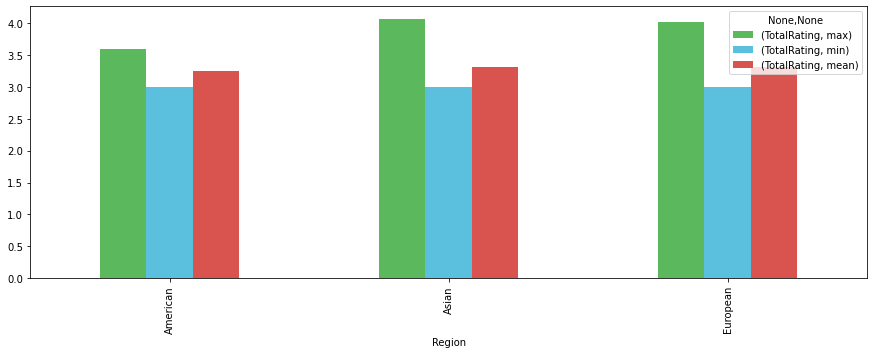

In [34]:
# Group the data by Region and calculate the mean of the Rating and Review columns
TotalRating_df = kyoto_df.groupby('Region').agg({'TotalRating': ['max', 'min', 'mean']})
TotalRating_df.plot(kind='bar', figsize=(15, 5), color=['#5cb85c','#5bc0de','#d9534f'])
TotalRating_df

,ReviewNum,TotalRating
Region,,
American,18.73,3.25
Asian,55.53,3.31
European,29.72,3.31


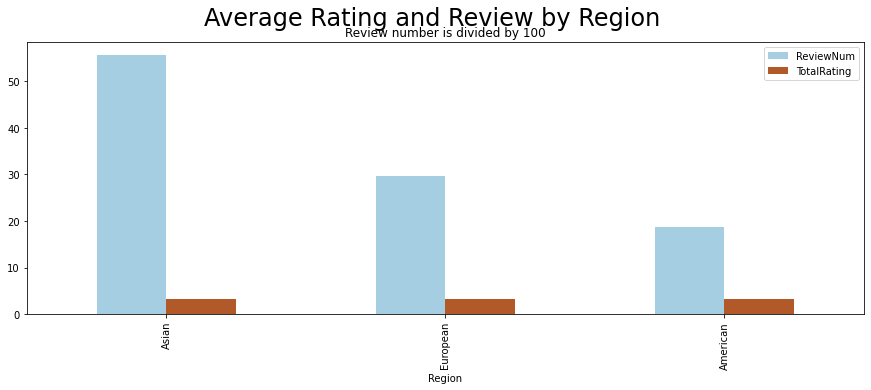

In [35]:
grouped = kyoto_df.groupby('Region').agg({'ReviewNum': 'sum', 'TotalRating': 'mean'})
grouped["TotalRating"] = round(grouped["TotalRating"], 2)
grouped["ReviewNum"] = grouped["ReviewNum"] / 100
grouped.sort_values("ReviewNum", ascending=False).plot(kind='bar', figsize=(15, 5), colormap='Paired')
plt.title("Review number is divided by 100")
plt.suptitle('Average Rating and Review by Region',fontsize=24)
grouped